### K-Nearest Neighbors (KNN)

![](https://miro.medium.com/v2/resize:fit:679/1*n9v1xsBi0bek98rqBnWGEg.gif)

K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used for both classification and regression tasks. The logic behind KNN is straightforward:

1. **Training Phase**: In the training phase, the algorithm simply memorizes the feature vectors and corresponding labels of the training data. 

2. **Prediction Phase**:
   - For a given unlabeled data point, KNN calculates the distances between this point and all other points in the training set. The distance metric used can vary, but commonly used ones include Euclidean distance, Manhattan distance, or cosine similarity.
   - It then identifies the K nearest neighbors to the unlabeled point based on these distances.
   - For classification tasks, it assigns the most common class label among these K neighbors to the unlabeled point.
   - For regression tasks, it calculates the average or weighted average of the target values of these K neighbors and assigns it to the unlabeled point.

3. **Choosing K**: The choice of K (the number of neighbors) is a hyperparameter that needs to be specified beforehand. It can significantly affect the performance of the algorithm. A smaller value of K can lead to more flexible decision boundaries but may also increase the noise sensitivity, while a larger value of K can smooth out the decision boundaries but may ignore local patterns.

4. **Decision Boundary**: KNN implicitly defines decision boundaries in the feature space based on the nearest neighbors. In classification, these decision boundaries are determined by the class labels of the neighboring points.

In summary, the simple logic behind KNN is to make predictions for new data points based on the majority vote (for classification) or averaging (for regression) of the labels of their nearest neighbors in the training set. It's called "nearest neighbors" because the prediction is based on the closest data points in the feature space.

KNN = https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

### Step-by-Step explanation of how the K-Nearest Neighbors (KNN) algorithm works:

1. **Data Collection and Preprocessing**:
   - Collect a dataset consisting of feature vectors (attributes) and corresponding labels (class or target values).
   - Preprocess the data if necessary by handling missing values, normalizing features, or encoding categorical variables.

2. **Choose the Value of K**:
   - Select the number of neighbors (K) to consider when making predictions. This is typically chosen based on cross-validation or other validation methods.

3. **Distance Calculation**:
   - Compute the distance between the new data point (query point) and every point in the training dataset. Common distance metrics include Euclidean distance, Manhattan distance, or cosine similarity.
   - The choice of distance metric depends on the nature of the data and the problem at hand.

4. **Find K Nearest Neighbors**:
   - Identify the K training data points that are closest to the query point based on the calculated distances.
   - These K data points are the "nearest neighbors" to the query point.

5. **Majority Voting (Classification) or Average (Regression)**:
   - For classification:
     - If the problem is classification, count the number of data points in each class among the K nearest neighbors.
     - Assign the query point to the class that appears most frequently among its K nearest neighbors. This is known as majority voting.
   - For regression:
     - If the problem is regression, take the average (or weighted average) of the target values of the K nearest neighbors.
     - Assign this average value to the query point as its predicted target value.

6. **Prediction**:
   - Return the predicted class label (for classification) or predicted target value (for regression) for the query point.

7. **Evaluate Model Performance**:
   - Assess the performance of the KNN model using appropriate evaluation metrics such as accuracy, precision, recall, F1-score (for classification), or mean squared error (for regression).
   - Optionally, fine-tune hyperparameters (such as K) to improve performance.

8. **Repeat for New Data**:
   - Once the model is trained and evaluated, it can be used to make predictions on new, unseen data points usingng data points in the training set.

### Code Example on *Breast Cancer Wisconsin (Diagnostic) Data Set*

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df['Unnamed: 32'].unique()

array([nan])

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Diagnosis (M = malignant, B = benign)


- **Malignant**: Malignant tumors are cancerous growths that can invade nearby tissues and spread to other parts of the body. They are characterized by uncontrolled cell growth, often with the ability to metastasize (spread) to distant organs or tissues, which can be life-threatening if not treated promptly.

- **Benign**: Benign tumors are non-cancerous growths that do not invade nearby tissues or spread to other parts of the body. They usually grow slowly and are typically not life-threatening. However, depending on their size and location, benign tumors can sometimes cause health problems or discomfort and may require medical interventealth.

In [6]:
df.shape

(569, 31)

In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
# Convert the target variable 'y' from categorical ('M'/'B') to numerical labels (0/1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [10]:
X_train.shape

(455, 30)

#### Data scaling is important in K-Nearest Neighbors (KNN) algorithm for a couple of reasons:

1. **Distance Calculation**: KNN relies on distance metrics to determine the similarity between data points. If the features are on different scales, features with larger magnitudes may dominate the distance calculations. This can lead to biased results where certain features have a disproportionate influence on the outcome. Scaling the features ensures that each feature contributes equally to the distance calculation.

2. **Convergence Speed**: Data scaling can also help improve the convergence speed of the algorithm. When features are on vastly different scales, it may take longer for the algorithm to converge to the optimal solution.

Common methods for scaling data include:

- **Min-Max Scaling**: This method scales the data to a fixed range, usually between 0 and 1. It's calculated as `(x - min(x)) / (max(x) - min(x))`, where `x` is the feature value.

- **Standardization (Z-score Normalization)**: This method scales the data to have a mean of 0 and a standard deviation of 1. It's calculated as `(x - mean(x)) / std_dev(x)`, where `x` is the feature value.

- **Normalization**: This method scales each feature to have a unit norm, meaning that the sum of the squares of the values of each feature is equal to 1. It's calculated as `x / norm(x)`.

Before applying KNN, it's generally a good practice to preprocess the data by scaling it appropriately based on the characteristics of the dataset and the requirements of the algorithm. This ensures that the algorithm performs optimally and is not biased by differences in feature scales.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [13]:
X_train.shape

(455, 30)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9736842105263158

### How to select (k) n_neighbors=?

In [17]:
scores = []

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


In [18]:
scores

[0.956140350877193,
 0.9736842105263158,
 0.9912280701754386,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544]

In [19]:
print("Maximum value:",np.max(scores))
print("Index of maximum value:", np.argmax(scores))
print("Number of 'K':", np.argmax(scores) + 1)

Maximum value: 0.9912280701754386
Index of maximum value: 2
Number of 'K': 3


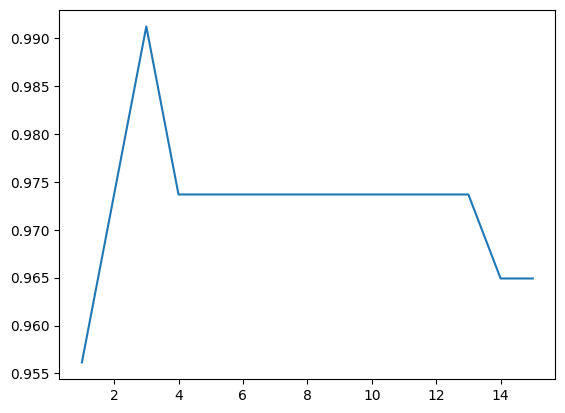

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1,16), scores)
plt.show()

Optimal Value of K in this example is 3

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9912280701754386

### Decision Surface

![DS](https://miro.medium.com/max/520/1*WPUEBVr3-emXrQMKe-03jw.png)

A decision surface, also known as a decision boundary, is a conceptual boundary or surface that separates different classes or categories in a classification problem. It represents the regions in the feature space where the classification model assigns different labels or categories to the input data points.

In a binary classification problem, where there are two classes (e.g., class 0 and class 1), the decision surface is a line, curve, or higher-dimensional surface that divides the feature space into two regions, each corresponding to one of the classes. The decision surface indicates the points at which the classification model changes its prediction from one class to another.

For example, in a 2-dimensional feature space, the decision surface could be a straight line that separates one class from another. In a more complex scenario with higher-dimensional feature spaces, the decision surface may take the form of a hyperplane or a more intricate boundary.

The goal of a classification algorithm is to learn the decision surface from the training data so that it can accurately classify new, unseen data points. Different classification algorithms may result in different decision surfaces depending on their underlying assumptions and methodologies.

Visualizing the decision surface can be helpful for understanding how a classification model makes predictions and how well it generalizes to new data. Techniques such as plotting the decision surface in 2D or 3D (for visualization purposes) can provide insights into the model's behavior and performance.

In [22]:
X_test.shape

(114, 30)

In [23]:
X_train.shape

(455, 30)

### Overfitting and Underfitting in KNN

Overfitting and Underfitting are two common issues that can occur when training a model like K-Nearest Neighbors (KNN).

1. **Overfitting**:
   - Overfitting occurs when a model learns the training data too well, including noise or random fluctuations. As a result, the model performs well on the training data but fails to generalize to new, unseen data.
   - In KNN, overfitting can occur if the value of **`k` (the number of nearest neighbors) is too small**. A small value of `k` can lead to a complex decision boundary that closely follows the training data, including its noise.
   - Additionally, having too many features or irrelevant features in the dataset can also contribute to overfitting in KNN, as it may lead to high-dimensional feature spaces where the notion of proximity becomes less meaningful.

2. **Underfitting**:
   - Underfitting occurs when a model is too simple to capture the underlying structure of the data. As a result, the model performs poorly on both the training and test data.
   - In KNN, **underfitting can occur if the value of `k` is too large**. A large value of `k` can lead to a simple decision boundary that ignores local variations in the data.
   - Additionally, underfitting in KNN can occur if the number of neighbors is too small relative to the complexity of the dataset, leading to a lack of sensitivity to the underlying patterns.

To address overfitting and underfitting in KNN, you can:

- **Optimize the value of `k`**: Experiment with different values of `k` and use techniques like cross-validation to find the optimal value that balances bias and variance.
- **Feature selection and dimensionality reduction**: Select relevant features and reduce the dimensionality of the feature space to mitigate the risk of overfitting, especially in high-dimensional datasets.
- **Regularization**: Techniques like feature scaling or distance weighting can help mitigate the influence of irrelevant features or noisy data points.
- **Ensemble methods**: Combine multiple KNN models with different `k` values or other classifiers to reduce the risk of overfitting or underfitting.
- **Model evaluation**: Use techniques like learning curves, validation curves, and holdout validation to diagnose and address overfitting and underfitting issues.

Overall, finding the right balance between model complexity and generalization is crucial in mitigating the risks of overfitting and underfitting in KNN and other machine learning models.

### Limitations of KNN

While K-Nearest Neighbors (KNN) is a simple and intuitive algorithm, it comes with several limitations:

1. **Computationally expensive**: KNN requires computing the distances between the query point and all training samples, which can be computationally expensive, especially for large datasets. As the dataset grows, the computational cost of predicting new instances increases linearly with the number of samples.

2. **Memory-intensive**: KNN stores all the training data, which can consume a significant amount of memory, especially for large datasets with many features or high-dimensional data.

3. **Sensitive to irrelevant features**: KNN considers all features equally when computing distances between data points. If the dataset contains irrelevant or noisy features, it can negatively impact the performance of KNN.

4. **Needs feature scaling**: KNN's performance can be influenced by the scale of features. Features with larger scales may dominate the distance calculations, leading to biased results. Therefore, it's essential to scale the features before applying KNN.

5. **Requires appropriate distance metric**: The choice of distance metric in KNN (e.g., Euclidean distance, Manhattan distance, etc.) can significantly impact the algorithm's performance. Selecting an appropriate distance metric depends on the characteristics of the dataset and the problem domain.

6. **Insensitive to local structure**: KNN treats all neighbors equally and does not consider the local structure or density of data points. As a result, it may perform poorly in datasets with complex or nonlinear decision boundaries.

7. **Difficulty handling high-dimensional data**: In high-dimensional spaces, the notion of distance becomes less meaningful, a phenomenon known as the curse of dimensionality. This can lead to degraded performance and increased computational complexity for KNN.

8. **Imbalanced datasets**: KNN may not perform well on imbalanced datasets where one class significantly outnumbers the others. It tends to favor the majority class, leading to biased predictions.

9. **No model representation**: Unlike parametric models (e.g., linear regression, logistic regression), KNN does not learn a model representation from the training data. Instead, it memorizes the entire training dataset, making it challenging to interpret the learned relationships between features and target.

10. **Sensitive to noisy data**: KNN is sensitive to noisy data points, outliers, and missing values, as they can significantly impact the computed distances and subsequently the predictions.

Despite these limitations, KNN remains a popular choice for classification and regression tasks, especially for small to medium-sized datasets with relatively low computational requirements. However, it's essential to understand its limitations and consider them when applying the algorithm to real-world problems.